#  <center> Voice classification using ML <center>

### We are going to build a speech emotion detection classifier.
### But first let us see What is Voice Classification?
* Voice Classification is the process of listening to and analyzing audio recordings. Also known as sound classification, this process is at the heart of a variety of modern AI technology, including virtual assistants, automatic speech recognition and text to speech applications.
  
### We were asked to built a python application that analyses the sentiment behind the tone of the voice   and predicts the Sentiment involved, we can use an open source dataset for the same.

#### Why we need it?

1. Voice recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

2. SER(Speech Emotion Recognition) or classification of voice is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services

3. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

#### Dataset used in this project
Toronto emotional speech set (TESS)

Note : This whole execution is performed in online platform kaggle.com

## Import Modules 

In [1]:
import pandas as pd        #for data analysis and associated manipulation of tabular data in DataFrames
import numpy as np         #for working with arrays
import os                  #to deal with files
import seaborn as sns      #for visualisation
import matplotlib.pyplot as plt   #graph plotting library
import librosa                    #for audio analysis
import librosa.display
from IPython.display import Audio
import warnings                  #to deal with warnings
warnings.filterwarnings('ignore')

### Details about dataset 
* This dataset was put together by University of Toronto
* These stimuli were modeled on the Northwestern University Auditory Test No. 6 (NU-6; Tillman & Carhart, 1966). A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total.

* The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

* Two actresses were recruited from the Toronto area. Both actresses speak English as their first language, are university educated, and have musical training. Audiometric testing indicated that both actresses have thresholds within the normal range.

* Authors: Kate Dupuis, M. Kathleen Pichora-Fuller

* University of Toronto, Psychology Department, 2010.

#### The path for the dataset is as given below
"""
 for dirname, _, filenames in os.walk('/kaggle/input'):
     for filename in filenames:
         print(os.path.join(dirname, filename))
        """

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:               
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

## Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

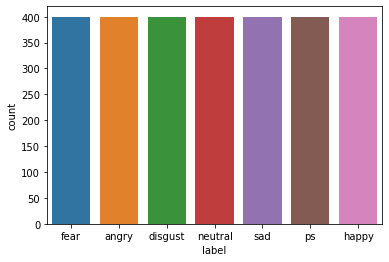

In [8]:
sns.countplot(df['label'])

In [9]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size =20)
    librosa.display.waveshow(data, sr=sr)
    plt.show
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size =20)
    librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

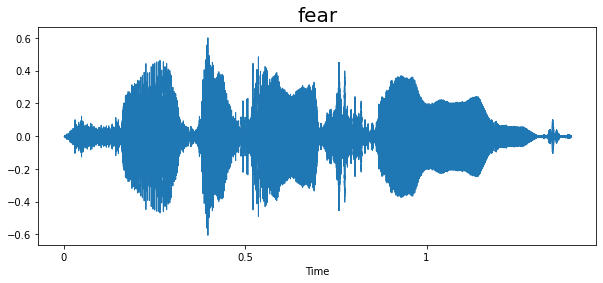

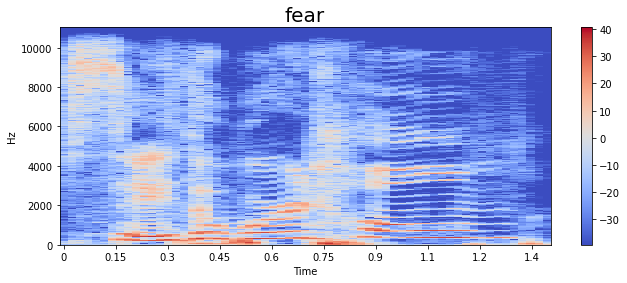

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

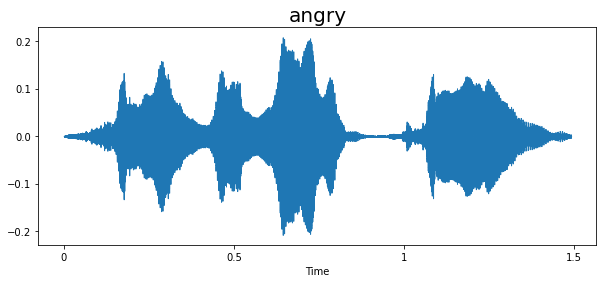

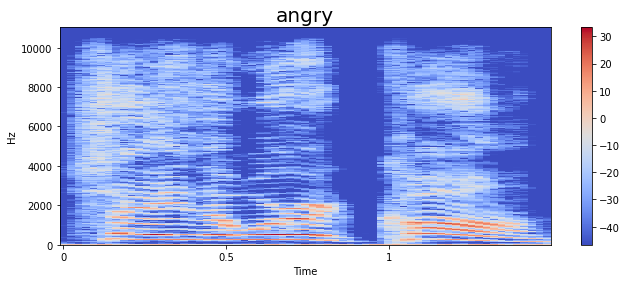

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[50]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

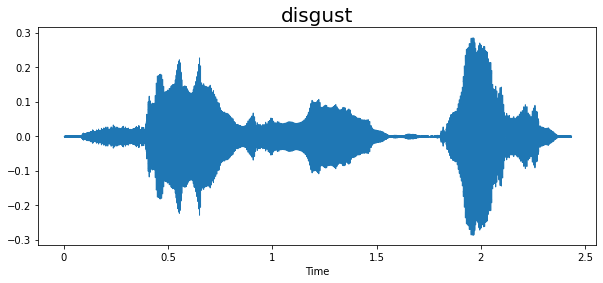

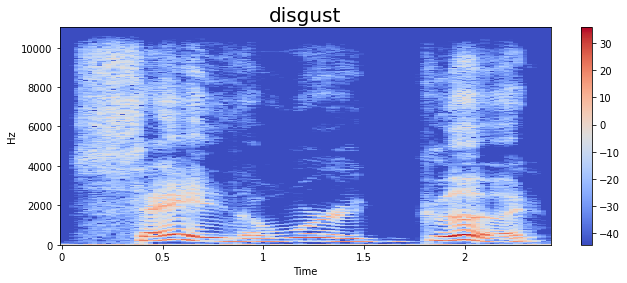

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

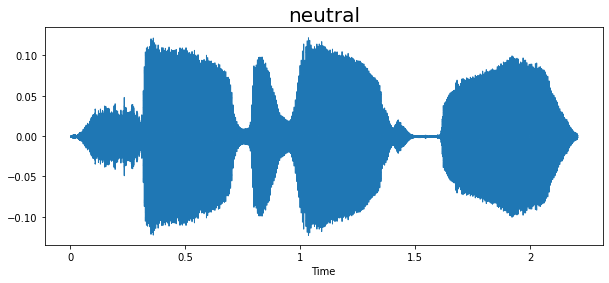

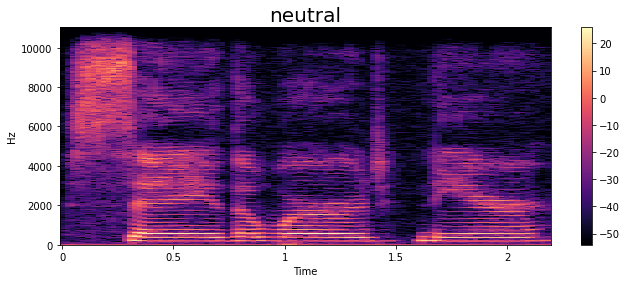

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[399]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

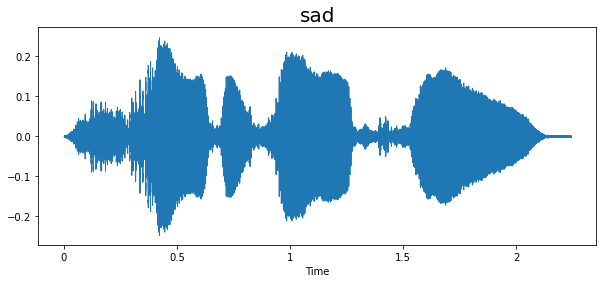

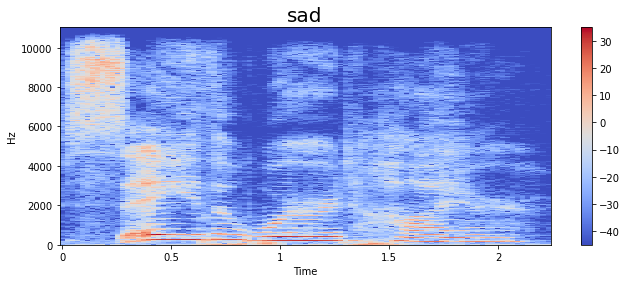

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[399]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

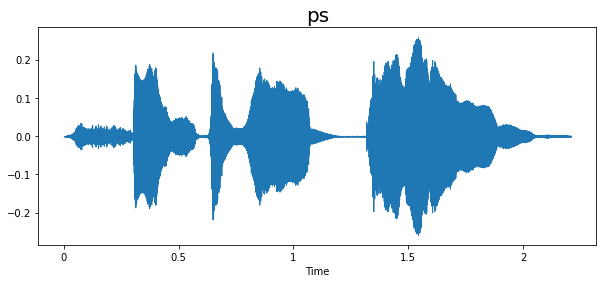

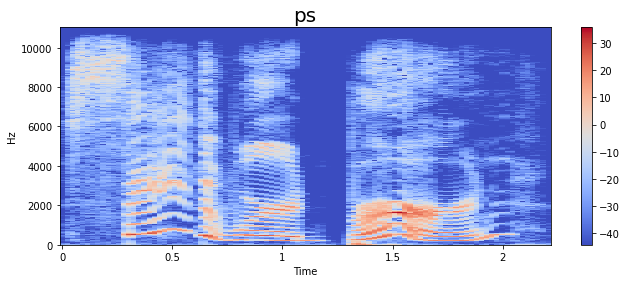

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[200]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

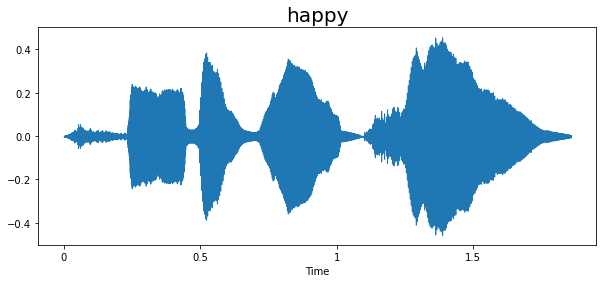

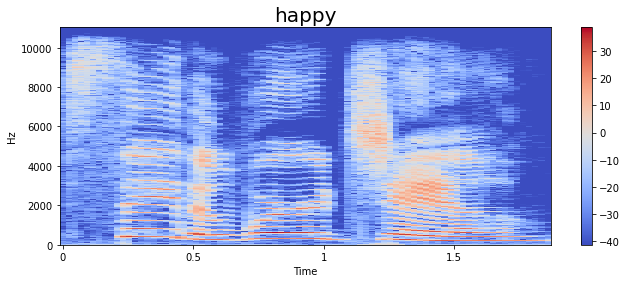

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction 

## MFCC 

* MFCC coefficients, called mel-frequency cepstral coefficients (MFCCs), are the final features used in many machine learning models trained on audio data!
* MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone. MFCCs are also increasingly finding uses in music information retrieval applications such as genre classification, audio similarity measures, etc.

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-287.13037   ,   87.756935  ,   -4.139177  ,   24.081968  ,
        -16.696724  ,   12.970632  ,   10.522444  ,   -1.1463214 ,
         -0.73337686,   12.855532  ,  -19.147291  ,   -6.418063  ,
          4.9657683 ,   -2.6571155 ,  -10.655444  ,    4.9578815 ,
        -14.55586   ,   15.37587   ,   18.444935  ,   23.878317  ,
         31.495146  ,   17.326372  ,   -4.7648373 ,    1.7432437 ,
        -12.009847  ,    7.34574   ,   -3.2051265 ,   -7.171453  ,
        -11.410634  ,   -2.001994  ,   -5.610964  ,    4.5321946 ,
        -11.396625  ,   -8.892363  ,   -3.7391376 ,    4.8819685 ,
         -1.5599903 ,    2.465447  ,   11.59915   ,   11.042192  ],
      dtype=float32)

In [19]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))

In [20]:
x_mfcc

0       [-287.13037, 87.756935, -4.139177, 24.081968, ...
1       [-350.0836, 37.654167, -6.2928553, 17.09615, 4...
2       [-341.78152, 56.153652, -16.617884, 23.219698,...
3       [-309.17456, 24.854897, -8.00109, 10.065497, -...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
2795    [-376.5839, 63.9598, -3.0598662, 11.498796, -2...
2796    [-316.5801, 43.54606, -9.336959, -0.198444, -5...
2797    [-359.7638, 81.01536, -18.355762, 5.3012295, -...
2798    [-354.38315, 103.432144, -15.916284, -10.30884...
2799    [-391.15958, 56.44471, -1.0464002, 0.9587419, ...
Name: speech, Length: 2800, dtype: object

In [21]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(2800, 40)

In [22]:
##input split
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(2800, 7)

### We will not be using train_test_split because we will be performing validation split

## Create the LSTM model

## 

In [54]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 7)               

In [55]:
# Train the model
history = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 18ms/step - loss: 1.0611 - accuracy: 0.6071 - val_loss: 2.5047 - val_accuracy: 0.1554
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3590 - accuracy: 0.8786 - val_loss: 1.6158 - val_accuracy: 0.4500
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.2068 - accuracy: 0.9330 - val_loss: 1.9835 - val_accuracy: 0.4446
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1380 - accuracy: 0.9563 - val_loss: 2.8679 - val_accuracy: 0.1982
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1569 - accuracy: 0.9473 - val_loss: 2.5600 - val_accuracy: 0.3696
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0921 - accuracy: 0.9710 - val_loss: 2.3009 - val_accuracy: 0.5321
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.0909 - accuracy: 0.9701 - val_loss: 2.5958 - val_accuracy: 0.5089
Epoch 8/50
35/35 [=

In [56]:
#best val accuracy is 68.21
#We need to use the checkpoint to save the best val accuracy model

## Plot the results 

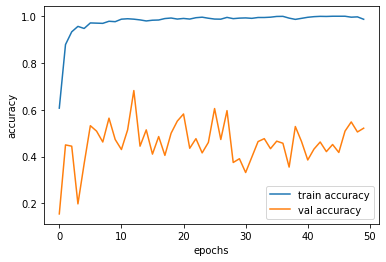

In [57]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

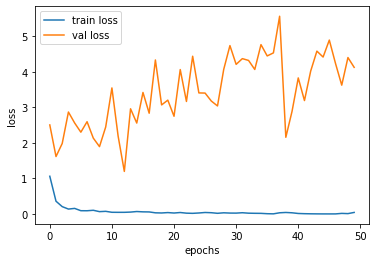

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## The best val accuracy of our model is 68.21% 